In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import requests
import datetime
from pprint import pprint

# Import API key
#from api_keys import api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy



In [4]:
#Mental Health Facilities in the US
Expenditure_file = "../data/cleandata/Expenditure.csv"
suicide_file = "../data/cleandata/SuicByState10yr.csv"
ourExpenditure_df = pd.read_csv(Expenditure_file)
suicide_df = pd.read_csv(suicide_file)

ourExpenditure_df



,state,Location,FY2004__SMHA Expenditures Per Capita,FY2005__SMHA Expenditures Per Capita,FY2006__SMHA Expenditures Per Capita,FY2007__SMHA Expenditures Per Capita,FY2008__SMHA Expenditures Per Capita,FY2009__SMHA Expenditures Per Capita,FY2010__SMHA Expenditures Per Capita,FY2011__SMHA Expenditures Per Capita,FY2012__SMHA Expenditures Per Capita,FY2013__SMHA Expenditures Per Capita
0,AL,Alabama,58.78,60.31,64.43,74.03,79.39,77.89,78.19,78.33,76.27,72.64
1,AK,Alaska,287.56,269.64,278.63,293.16,277.03,289.71,310.01,380.33,335.36,341.08
2,AZ,Arizona,135.64,146.22,156.78,158.07,173.85,196.13,221.27,214.48,209.44,205.23
3,AR,Arkansas,32.95,35.60,38.58,39.72,40.53,42.77,42.02,NaN,45.05,45.56
4,CA,California,113.61,118.65,122.98,134.94,150.34,157.62,152.60,162.00,169.65,160.50
5,CO,Colorado,69.07,74.28,71.69,76.33,81.71,86.83,88.41,91.16,95.01,98.80
6,CT,Connecticut,152.09,157.21,169.68,174.94,188.74,197.62,189.34,202.44,213.43,216.76
7,DE,Delaware,84.92,89.19,103.60,105.75,111.07,109.13,106.04,101.94,100.02,96.53
8,DC,District of Columbia,409.92,404.40,394.10,392.27,381.90,388.83,NaN,307.45,305.37,306.87
9,FL,Florida,35.96,36.56,38.17,39.87,42.11,40.90,39.55,39.04,37.28,NaN


In [5]:
ourfiltered_suicide_df  = suicide_df[['stateName','2004suic', '2005suic', '2006suic', '2007suic', '2008suic', '2009suic', '2010suic', '2011suic', '2012suic', '2013suic']]
ourfiltered_suicide_df 


,stateName,2004suic,2005suic,2006suic,2007suic,2008suic,2009suic,2010suic,2011suic,2012suic,2013suic
0,Alabama,74.0,74.7,78.1,78.4,77.3,73.2,73.0,77.1,71.1,72.1
1,Alaska,87.6,78.9,80.5,89.1,89.3,80.9,90.0,84.3,85.0,81.8
2,Arizona,76.4,82.9,83.7,79.2,72.3,70.4,73.2,73.4,72.0,75.1
3,Arkansas,75.9,74.7,76.7,76.7,78.3,76.8,74.8,75.8,77.8,72.4
4,California,48.2,48.8,49.4,49.6,46.8,46.2,44.2,44.6,44.1,44.9
5,Colorado,65.9,67.4,64.4,67.3,68.9,68.8,65.4,69.6,72.4,70.4
6,Connecticut,46.2,42.4,47.0,46.8,48.7,45.6,47.8,47.6,49.5,51.5
7,Delaware,52.3,51.7,56.8,53.3,60.7,56.1,59.3,54.8,61.7,63.4
8,District of Columbia,75.0,74.2,70.9,67.6,63.9,51.2,63.3,54.5,51.6,54.1
9,Florida,64.6,66.2,66.7,68.3,67.5,65.2,63.8,63.0,61.4,59.5


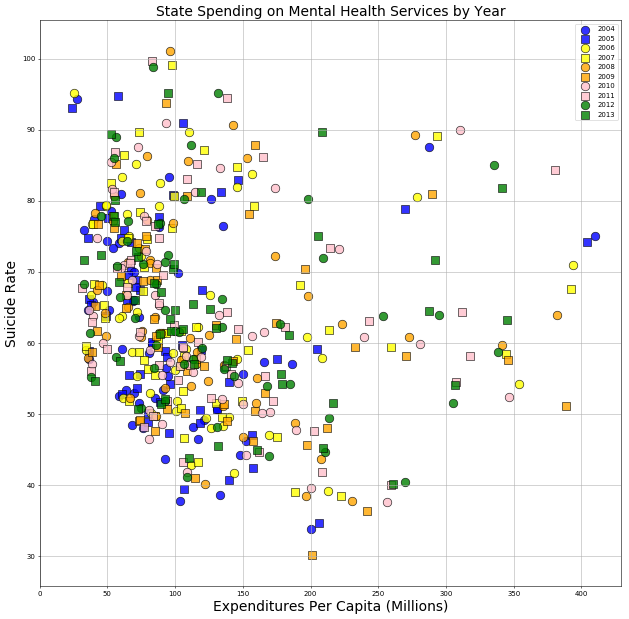

,stateName,2004suic,2005suic,2006suic,2007suic,2008suic,2009suic,2010suic,2011suic,2012suic,2013suic
0,Alabama,74.0,74.7,78.1,78.4,77.3,73.2,73.0,77.1,71.1,72.1
1,Alaska,87.6,78.9,80.5,89.1,89.3,80.9,90.0,84.3,85.0,81.8
2,Arizona,76.4,82.9,83.7,79.2,72.3,70.4,73.2,73.4,72.0,75.1
3,Arkansas,75.9,74.7,76.7,76.7,78.3,76.8,74.8,75.8,77.8,72.4
4,California,48.2,48.8,49.4,49.6,46.8,46.2,44.2,44.6,44.1,44.9
5,Colorado,65.9,67.4,64.4,67.3,68.9,68.8,65.4,69.6,72.4,70.4
6,Connecticut,46.2,42.4,47.0,46.8,48.7,45.6,47.8,47.6,49.5,51.5
7,Delaware,52.3,51.7,56.8,53.3,60.7,56.1,59.3,54.8,61.7,63.4
8,District of Columbia,75.0,74.2,70.9,67.6,63.9,51.2,63.3,54.5,51.6,54.1
9,Florida,64.6,66.2,66.7,68.3,67.5,65.2,63.8,63.0,61.4,59.5


In [6]:
Expenditures_2004 = ourExpenditure_df['FY2004__SMHA Expenditures Per Capita']
Expenditures_2005 = ourExpenditure_df['FY2005__SMHA Expenditures Per Capita']
Expenditures_2006 = ourExpenditure_df['FY2006__SMHA Expenditures Per Capita']
Expenditures_2007 = ourExpenditure_df['FY2007__SMHA Expenditures Per Capita']
Expenditures_2008 = ourExpenditure_df['FY2008__SMHA Expenditures Per Capita']
Expenditures_2009 = ourExpenditure_df['FY2009__SMHA Expenditures Per Capita']
Expenditures_2010 = ourExpenditure_df['FY2010__SMHA Expenditures Per Capita']
Expenditures_2011 = ourExpenditure_df['FY2011__SMHA Expenditures Per Capita']
Expenditures_2012 = ourExpenditure_df['FY2012__SMHA Expenditures Per Capita'] 
Expenditures_2013 = ourExpenditure_df['FY2013__SMHA Expenditures Per Capita']


suicide_rate_2004 = ourfiltered_suicide_df ['2004suic']
suicide_rate_2005 = ourfiltered_suicide_df ['2005suic']
suicide_rate_2006 = ourfiltered_suicide_df ['2006suic']
suicide_rate_2007 = ourfiltered_suicide_df ['2007suic']
suicide_rate_2008 = ourfiltered_suicide_df ['2008suic']
suicide_rate_2009 = ourfiltered_suicide_df ['2009suic']
suicide_rate_2010 = ourfiltered_suicide_df ['2010suic']
suicide_rate_2011 = ourfiltered_suicide_df ['2011suic']
suicide_rate_2012 = ourfiltered_suicide_df ['2012suic']
suicide_rate_2013 = ourfiltered_suicide_df ['2013suic']

plt.figure(figsize=(15,15), dpi=50)


scatter_2004 = plt.scatter(Expenditures_2004,suicide_rate_2004, s = 150, marker= "o", facecolors="blue", edgecolors="black", alpha=.8)
scatter_2005 = plt.scatter(Expenditures_2005, suicide_rate_2005, s = 150, marker= "s", facecolors= "blue", edgecolors="black", alpha=.8)
scatter_2006 = plt.scatter(Expenditures_2006, suicide_rate_2006, s = 150, marker= "o", facecolors= "yellow", edgecolors="black", alpha=.8)
scatter_2007 = plt.scatter(Expenditures_2007, suicide_rate_2007, s = 150, marker= "s", facecolors= "yellow", edgecolors="black", alpha=.8)
scatter_2008 = plt.scatter(Expenditures_2008, suicide_rate_2008, s = 150, marker= "o", facecolors= "orange", edgecolors="black", alpha=.8)
scatter_2009 = plt.scatter(Expenditures_2009, suicide_rate_2009, s = 150, marker= "s", facecolors= "orange", edgecolors="black", alpha=.8)
scatter_2010 = plt.scatter(Expenditures_2010, suicide_rate_2010, s = 150, marker= "o", facecolors= "pink", edgecolors="black", alpha=.8)
scatter_2011 = plt.scatter(Expenditures_2011, suicide_rate_2011, s = 150, marker= "s", facecolors= "pink", edgecolors="black", alpha=.8)
scatter_2012 = plt.scatter(Expenditures_2012, suicide_rate_2012, s = 150, marker= "o", facecolors="green", edgecolors="black", alpha=.8)
scatter_2013 = plt.scatter(Expenditures_2013, suicide_rate_2013, s = 150, marker= "s", facecolors="green", edgecolors="black", alpha=.8)



plt.title("State Spending on Mental Health Services by Year", fontsize = 20)
plt.xlabel("Expenditures Per Capita (Millions)", fontsize=20)
plt.ylabel("Suicide Rate", fontsize = 20)
plt.grid()



plt.legend((scatter_2004, scatter_2005, scatter_2006,scatter_2007,scatter_2008,scatter_2009, scatter_2010,scatter_2011,scatter_2012,scatter_2013),
           ('2004', '2005', '2006','2007','2008', '2009', '2010', '2011','2012','2013'), loc ='upper right',
           scatterpoints= 1,fontsize=10)
# Save Figure
plt.savefig("../Images/State_Spending_Affects_On_Mental_Health.png")

plt.show()

_

In [28]:
#x = ourExpenditure_df[43]
Texas_Expenditures_Texas = ourExpenditure_df[['FY2004__SMHA Expenditures Per Capita','FY2005__SMHA Expenditures Per Capita',
                                             'FY2006__SMHA Expenditures Per Capita','FY2007__SMHA Expenditures Per Capita',
                                             'FY2008__SMHA Expenditures Per Capita','FY2009__SMHA Expenditures Per Capita',
                                             'FY2010__SMHA Expenditures Per Capita','FY2011__SMHA Expenditures Per Capita',
                                            'FY2012__SMHA Expenditures Per Capita','FY2013__SMHA Expenditures Per Capita']]


#Texas_Expenditures_2005 = ourExpenditure_df['FY2005__SMHA Expenditures Per Capita']
#Expenditures_2006 = ourExpenditure_df['FY2006__SMHA Expenditures Per Capita']
#Expenditures_2007 = ourExpenditure_df['FY2007__SMHA Expenditures Per Capita']
#Expenditures_2008 = ourExpenditure_df['FY2008__SMHA Expenditures Per Capita']
#Expenditures_2009 = ourExpenditure_df['FY2009__SMHA Expenditures Per Capita']
#Expenditures_2010 = ourExpenditure_df['FY2010__SMHA Expenditures Per Capita']
#Expenditures_2011 = ourExpenditure_df['FY2011__SMHA Expenditures Per Capita']
#Expenditures_2012 = ourExpenditure_df['FY2012__SMHA Expenditures Per Capita'] 
#Expenditures_2013 = ourExpenditure_df['FY2013__SMHA Expenditures Per Capita']

Texas_suicide_rate_Texas = ourfiltered_suicide_df [['2004suic','2005suic','2006suic','2007suic','2008suic','2009suic','2010suic','2011suic','2012suic','2013suic']]
#Texas_suicide_rate_2004 = ourfiltered_suicide_df ['2004suic'][44]
#Texas_suicide_rate_2004 = ourfiltered_suicide_df ['2004suic'][44]
#Texas_suicide_rate_2004 = ourfiltered_suicide_df ['2004suic'][44]
#texas_suicide_rate_2004 = ourfiltered_suicide_df ['2004suic'][44]
#suicide_rate_2005 = ourfiltered_suicide_df ['2005suic']
#suicide_rate_2006 = ourfiltered_suicide_df ['2006suic']
#suicide_rate_2007 = ourfiltered_suicide_df ['2007suic']
#suicide_rate_2008 = ourfiltered_suicide_df ['2008suic']
#suicide_rate_2009 = ourfiltered_suicide_df ['2009suic']
#suicide_rate_2010 = ourfiltered_suicide_df ['2010suic']
#suicide_rate_2011 = ourfiltered_suicide_df ['2011suic']
#suicide_rate_2012 = ourfiltered_suicide_df ['2012suic']
#suicide_rate_2013 = ourfiltered_suicide_df ['2013suic']

plt.figure(figsize=(15,15), dpi=50)


avg_scatter_2004 = plt.scatter(Texas_Expenditures_Texas,Texas_suicide_rate_Texas, s = 150, marker= "o", facecolors="blue", edgecolors="black", alpha=.8)
#scatter_2005 = plt.scatter(Expenditures_2005, suicide_rate_2005, s = 150, marker= "s", facecolors= "blue", edgecolors="black", alpha=.8)
#scatter_2006 = plt.scatter(Expenditures_2006, suicide_rate_2006, s = 150, marker= "o", facecolors= "yellow", edgecolors="black", alpha=.8)
#scatter_2007 = plt.scatter(Expenditures_2007, suicide_rate_2007, s = 150, marker= "s", facecolors= "yellow", edgecolors="black", alpha=.8)
#scatter_2008 = plt.scatter(Expenditures_2008, suicide_rate_2008, s = 150, marker= "o", facecolors= "orange", edgecolors="black", alpha=.8)
#scatter_2009 = plt.scatter(Expenditures_2009, suicide_rate_2009, s = 150, marker= "s", facecolors= "orange", edgecolors="black", alpha=.8)
#scatter_2010 = plt.scatter(Expenditures_2010, suicide_rate_2010, s = 150, marker= "o", facecolors= "pink", edgecolors="black", alpha=.8)
#scatter_2011 = plt.scatter(Expenditures_2011, suicide_rate_2011, s = 150, marker= "s", facecolors= "pink", edgecolors="black", alpha=.8)
#scatter_2012 = plt.scatter(Expenditures_2012, suicide_rate_2012, s = 150, marker= "o", facecolors="green", edgecolors="black", alpha=.8)
#scatter_2013 = plt.scatter(Expenditures_2013, suicide_rate_2013, s = 150, marker= "s", facecolors="green", edgecolors="black", alpha=.8)



plt.title("State Spending on Mental Health Services by Year", fontsize = 20)
plt.xlabel("Expenditures Per Capita (Millions)", fontsize=20)
plt.ylabel("Suicide Rate", fontsize = 20)
plt.grid()



plt.legend((scatter_2004, scatter_2005, scatter_2006,scatter_2007,scatter_2008,scatter_2009, scatter_2010,scatter_2011,scatter_2012,scatter_2013),
           ('2004', '2005', '2006','2007','2008', '2009', '2010', '2011','2012','2013'), loc ='upper right',
           scatterpoints= 1,fontsize=10)
# Save Figure
plt.savefig("../Images/State_Spending_Affects_On_Mental_Health.png")

plt.show()

IndexError: list index out of range

In [27]:
x

NameError: name 'x' is not defined